___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
bank = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

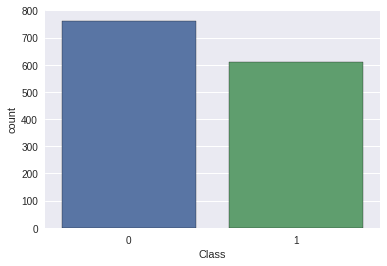

In [9]:
sns.countplot(x='Class', data=bank)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

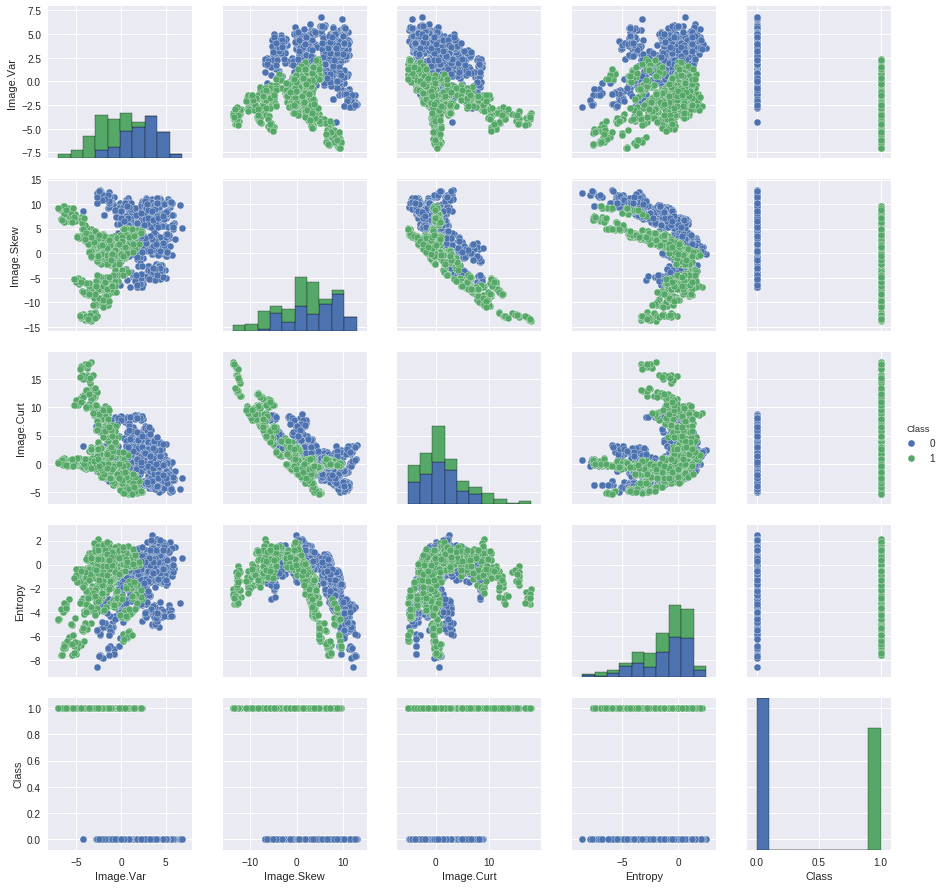

In [10]:
sns.pairplot(bank, hue='Class');

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [11]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [12]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [14]:
scaler.fit(bank.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [15]:
scaled_features = scaler.fit_transform(bank.drop('Class', axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [17]:
df_feat = pd.DataFrame(scaled_features, columns=bank.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [19]:
X = df_feat

In [20]:
y = bank['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [21]:
X = X.as_matrix()
y = y.as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [82]:
import tensorflow.contrib.learn.python.learn as learn

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [83]:
classifier = learn.DNNClassifier(hidden_units=[10,20,10], n_classes=2)

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [94]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

/Users/marci/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


DNNClassifier()

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [95]:
note_predictions = classifier.predict(X_test)

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(confusion_matrix(y_test, note_predictions))

[[237   0]
 [  1 174]]


In [98]:
print(classification_report(y_test, note_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200)

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
rfc_preds = rfc.predict(X_test)

In [29]:
print(classification_report(y_test, rfc_preds))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       229
          1       1.00      0.99      0.99       183

avg / total       1.00      1.00      1.00       412



In [30]:
print(confusion_matrix(y_test, rfc_preds))

[[229   0]
 [  2 181]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!